In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [91]:
# Import the data
data=pd.read_csv("fuel_ferc1.csv")

In [92]:
data.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


In [93]:
data.shape

(29523, 11)

In [94]:
data.columns

Index(['record_id', 'utility_id_ferc1', 'report_year', 'plant_name_ferc1',
       'fuel_type_code_pudl', 'fuel_unit', 'fuel_qty_burned',
       'fuel_mmbtu_per_unit', 'fuel_cost_per_unit_burned',
       'fuel_cost_per_unit_delivered', 'fuel_cost_per_mmbtu'],
      dtype='object')

In [95]:
# Finding feature with missing value
data.isna().any()

record_id                       False
utility_id_ferc1                False
report_year                     False
plant_name_ferc1                False
fuel_type_code_pudl             False
fuel_unit                        True
fuel_qty_burned                 False
fuel_mmbtu_per_unit             False
fuel_cost_per_unit_burned       False
fuel_cost_per_unit_delivered    False
fuel_cost_per_mmbtu             False
dtype: bool

In [96]:
# Removing Null values row
row_before=data.shape[0]
data=data.dropna(axis=0)
row_after=data.shape[0]

In [97]:
# Total missing values
Missing=row_before-row_after
Missing

180

In [98]:
# Percentage of the missing rows as a factor of the total number of rows
Percent=(Missing/row_before)*100
Percent

0.609694136774718

In [99]:
data['fuel_type_code_pudl'].unique()

array(['coal', 'gas', 'nuclear', 'oil', 'waste', 'other'], dtype=object)

In [100]:
#  average fuel cost per unit burned
Avg=data[['fuel_type_code_pudl','fuel_cost_per_unit_burned']].groupby(['fuel_type_code_pudl'])['fuel_cost_per_unit_burned'].describe()
Avg
# Gas has lowest avg fuel cost

,count,mean,std,min,25%,50%,75%,max
fuel_type_code_pudl,,,,,,,,
coal,8496.0,67.603187,946.595095,0.00,23.9495,33.364,44.67175,44033.320
gas,11433.0,13.707197,163.663028,0.00,3.2400,4.656,6.97000,10490.000
nuclear,803.0,5047.223037,14408.912038,0.00,1.6130,32.330,50.98600,69785.215
oil,8043.0,169.045434,2409.234752,0.00,37.5950,68.842,98.62650,139358.000
other,131.0,20.444221,30.615725,-119.04,5.8725,14.685,25.92500,134.547
waste,437.0,19.647350,30.092811,-276.08,11.0210,22.877,32.92000,132.291


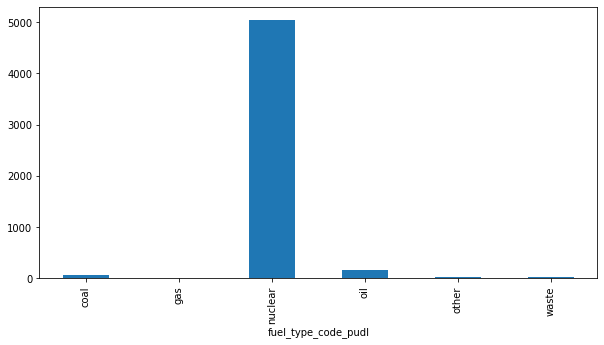

In [101]:
Avg['mean'].plot(kind='bar',figsize=(10,5))

In [102]:
#  Standard deviation and 75th percentile of the measure of energy per unit (Fuel_mmbtu_per_unit)
data['fuel_mmbtu_per_unit'].describe()

count    29343.000000
mean         8.477481
std         10.537478
min          0.000001
25%          1.024000
50%          5.763072
75%         17.000000
max        341.260000
Name: fuel_mmbtu_per_unit, dtype: float64

In [103]:
# Finding skewneed and kurtosis for fuel quantity burned
Skew=data['fuel_qty_burned'].skew()
Kurtosis=data['fuel_qty_burned'].kurtosis()
print('Skew and Kurtosis for fuel quantity burned is',Skew,'and',Kurtosis,'respectively')

Skew and Kurtosis for fuel quantity burned is 14.152573569147364 and 587.914076926934 respectively


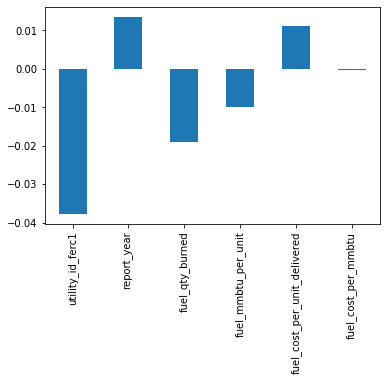

In [104]:
# Finding correlation between Fuel Cost Per Unit Burned and others
Corr=data.corr(method='pearson')['fuel_cost_per_unit_burned']
del Corr['fuel_cost_per_unit_burned']
Corr.plot(kind='bar')

In [122]:
# Report of 1998
data_1998=data[data['report_year']==1998]
Report_1998=data_1998[['fuel_type_code_pudl','fuel_cost_per_unit_burned']].groupby(['fuel_type_code_pudl'])['fuel_cost_per_unit_burned'].sum()

# Report of 1994
data_1994=data[data['report_year']==1994]
Report_1994=data_1994[['fuel_type_code_pudl','fuel_cost_per_unit_burned']].groupby(['fuel_type_code_pudl'])['fuel_cost_per_unit_burned'].sum()

In [128]:
# Finding percentage change for fuel type coal, change in the fuel cost per unit burned in 1998 compared to 1994
print('Percentage change of fuel cost per unit burned for coal in year 1998 as compared to year 1994 is -:',(Report_1998['coal']-Report_1994['coal'])*100/Report_1994['coal'])

Percentage change of fuel cost per unit burned for coal in year 1998 as compared to year 1994 is -: -19.971420703797236


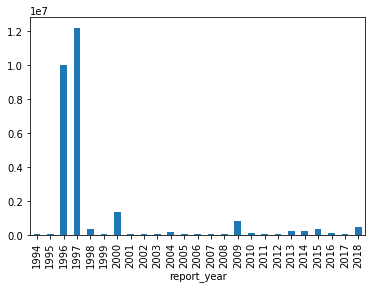

In [148]:
# For yearwise , the highest average fuel cost per unit delivered

#data['report_year'].unique()
Report=data[['report_year','fuel_cost_per_unit_delivered']].groupby(['report_year'])['fuel_cost_per_unit_delivered'].sum()
Report.plot(kind='bar',x='Year',y='Fuel cost per unit delivered')
